# Building your own quantum simulator

## 1. Quick Recap
Basis states are vectors in $\mathbb{C}^2$:<br/>
The Ket-Vectors are 2-by-1 (2,1)<br/>
$\begin{aligned}
|0\rangle &= \begin{pmatrix}1\\0\end{pmatrix}\\  |1\rangle&=\begin{pmatrix}0\\1\end{pmatrix}
\end{aligned}$

The Bra-Vectors are 1-by-2 (1,2)<br/>
$\begin{aligned}
\langle0| &= \begin{pmatrix}1&0\end{pmatrix}\\ \langle1|&=\begin{pmatrix}0&1\end{pmatrix}
\end{aligned}$

In python we use numpy arrays

In [25]:
import numpy as np

# To get the ket vectors one can either use this nested lists argument
ket0 = np.array([[1],[0]])
ket1 = np.array([[0],[1]])

# or reshape
ket0 = np.array([1,0]).reshape(2, 1) 
ket1 = np.array([0,1]).reshape(2, 1)

# To get the bra vectors
bra1 = np.array([1,0]).reshape(1, 2) 
bra0 = np.array([0,1]).reshape(1, 2) 

print(bra0.shape)

(1, 2)


## 2 Single-Qubit
### 2.1 Superposition states
The state of a qubit is described as a superposition of $|0\rangle$ and $|1\rangle$

$\begin{aligned}
|\psi\rangle = \alpha|0\rangle + \beta |1\rangle
\end{aligned}$

where $\alpha, \beta \in \mathbb{C}$.<br/>
Moreover this state has to be normed, hence <br/>

$\begin{aligned}
||\psi\rangle| &= \sqrt{\alpha^2 + \beta^2} &= 1\\\Rightarrow ||\psi\rangle|^2 &= \alpha^2 + \beta^2 &=1
\end{aligned}$

To normalize a given state <br/>

$\begin{aligned}
|\psi'\rangle = \frac{|\psi\rangle}{||\psi\rangle|} = \frac{|\psi\rangle}{\sqrt{\alpha + \beta}}
\end{aligned}$

In [26]:
# complex magnitudes for building a qubit state
a, b = 2, 1j

# building a superposition
psi = a * ket0 + b * ket1

# Attention. One has to normalize
psi_normed = psi / np.abs(psi)

### 2.2 Operations for single qubits

Operations with qubits are called Quantum Gates.<br/>
Quantum Gates are matrices in $\mathbb{C}^{2\times2}$ (2,2), e.g. 

the Hadamard Gate:<br/>

$\begin{aligned}
H &= \frac{1}{\sqrt{2}}\begin{pmatrix}1&1\\1&-1\end{pmatrix}
\end{aligned}$

or the Not-/Pauli-X Gate:<br/>

$\begin{aligned}
    X &= \begin{pmatrix}0&1\\1&0\end{pmatrix}
\end{aligned}$

or the Phase Gate:<br/>

$\begin{aligned}
    P &= \begin{pmatrix}1&0\\0&e^{i\Phi}\end{pmatrix}
\end{aligned}$




or other gates known form the lecture

In [27]:
# compare definitions in __init__() in qc_education_package/simulator.py    
# Hadamard gate
H = 1 / np.sqrt(2) * np.array([[1,1],[1,-1]])  

# Not or Pauli X gate
X = np.array([[0,1],[1,0]]) 

# Phase gate
P  = lambda phi : np.array([[1,0],[0,np.exp(1j * phi)]], dtype=complex) 

To work with this superposition state we can apply quantum gates.<br/>
Applying a quantum gate to a state is done multiplying the appropriate matrix product.

E.g. applying the Hadamard $H$ to a normed state $|\psi\rangle$:  <br/>

$\begin{aligned}
\psi &= 1 \cdot |0\rangle + 0 \cdot|1\rangle\\
\Rightarrow H \times |\psi\rangle &= H \times |0\rangle = \frac{1}{\sqrt(2)}\begin{pmatrix}1\\1\end{pmatrix}
\end{aligned}$

In [28]:
# Build some normed state
psi = 1 * ket0 + 0 * ket1

# Apply had
had_psi = H @ psi

# Hint: In Python version >3.5 this equals
had_psi = H.__matmul__(psi)
had_psi = np.matmul(H, psi)

Lets check the output an compare with the analytical solution known from the lecture

In [29]:
print(had_psi)

[[0.70710678]
 [0.70710678]]


Lets output nice by formatting the output string

In [30]:
# format output strings using numpy
def printnice(arr: np.array, pre=3) -> str:
    nice = np.array2string(arr, precision=pre,  sign='+')
    print(nice)


printnice(had_psi)

[[+0.707]
 [+0.707]]


### 2.3 Measuring a single qubit  
One can probe the probability for the superposition state to be in either $|0\rangle$ or $|1\rangle$ be using a projective measurement.<br/>

By defining the projectors (See Exercise 2 26.06.23<br/> 

$\begin{aligned}
P_{|0\rangle} =\tilde{n} &=|0\rangle \langle 0| &= \begin{pmatrix}1&0\\0&0\end{pmatrix}\\
P_{|1\rangle} = n &= |1\rangle \langle 1| &= \begin{pmatrix}0&0\\0&1\end{pmatrix}
\end{aligned}$

the state $\psi$ is projected into the subspace defined by $|0\rangle$ resp. $|1\rangle$<br/>

$\begin{aligned}
P_{|0\rangle} \times |0\rangle\\
P_{|1\rangle} \times |1\rangle
\end{aligned}$

Recalling the representation of a state in the complex plane (Exercise 1 28.04.23 - MathAndCoding[...].ipynb) gives an good intuitive idea of whats happening here:
![Alt text](proj.svg)
\ 


To get the probabilities for measuring either $|0\rangle$ or $|1\rangle$, one has to calculate the squared absolute value of the projected states in the corresponding space. <br/>
**Compare:** Math & Coding Afternoon 26.05.23<br/>

$\begin{aligned}
p_{|0\rangle} &= |P_{|0\rangle}\times|\psi\rangle|^2 \quad\big[= (|0\rangle \langle 0|\psi\rangle)^*\ |0\rangle \langle 0||\psi\rangle = \langle\psi^*|0\rangle \underbrace{\langle 0|0\rangle}_{=1} \langle 0|\psi\rangle = \langle\psi^*|0\rangle \langle 0|\psi\rangle \big]\\
p_{|1\rangle} &= |P_{|0\rangle}\times|\psi\rangle|^2 \quad\big[= ... \big]
\end{aligned}$


**Recall:** Measuring a single qubit will collaps the superposition state into a subspace, leading either to state $|0\rangle$ or $|1\rangle$

In [31]:
print("Measuring state")
printnice(had_psi)
print("by projective measurement\n")

print("Projection to span(|0>) using projector")
pro0 = ket0 @ bra0 
printnice(pro0)
print("with outcome")
state0 = pro0 @ had_psi
printnice(state0)

print("\nProjection to span(|1>) using projector")
pro1 = ket1 @ bra1 
printnice(pro1)
print("with outcome")
state1 = pro1 @ had_psi
printnice(state1)

p0 = np.linalg.norm(state0)**2
p1 = np.linalg.norm(state1)**2
print(f"\nProbabilities are {p0:2.2%} for $|0>, and  {p1:2.2%} for $|1>")

# Measuring the outcome = Random choice according to probabilities
result = np.random.choice(a=[0,1], p=[p0, p1])
print(f"Measured state is |{result:1d}>")

Measuring state
[[+0.707]
 [+0.707]]
by projective measurement

Projection to span(|0>) using projector
[[0 1]
 [0 0]]
with outcome
[[+0.707]
 [+0.   ]]

Projection to span(|1>) using projector
[[0 0]
 [1 0]]
with outcome
[[+0.   ]
 [+0.707]]

Probabilities are 50.00% for $|0>, and  50.00% for $|1>
Measured state is |1>


## 3. Multiple qubits

The following section will introduce working/simulating systems with multiple qubits.
The shown concepts are general and can be extended for arbitrary many qubits.

### 3.1 Building a quantum register
**Recall:** Slides Lecture 3
The Kronecker product is used to build a quantum register out of $n$ qubits<br/>

$\begin{aligned}
\begin{pmatrix}a\\b\end{pmatrix} \otimes \begin{pmatrix}c\\d\end{pmatrix} = \begin{pmatrix}a\begin{pmatrix}c\\d\end{pmatrix}\\b\begin{pmatrix}c\\d\end{pmatrix}\end{pmatrix} = \begin{pmatrix}ac\\ad\\bc\\bd\end{pmatrix}
\end{aligned}$

This will lead to a vector in $\mathbb{C}^{2^n}$ or a register with $2^n$ values.<br/>
E.g. the 3 qubit state 

$\begin{aligned}
0x5: |101\rangle := |1\rangle_3 \otimes |0\rangle_2 \otimes |1\rangle_1 = \begin{pmatrix}0\\1\end{pmatrix}\otimes\begin{pmatrix}1\\0\end{pmatrix}\otimes\begin{pmatrix}0\\1\end{pmatrix} = \begin{pmatrix}0\\1\end{pmatrix}\otimes\begin{pmatrix}1 \begin{pmatrix}0\\1\end{pmatrix}\\ 0 \begin{pmatrix}0\\1\end{pmatrix}\end{pmatrix} = \begin{pmatrix}0\\1\end{pmatrix}\otimes\begin{pmatrix}0\\1\\0\\0\end{pmatrix}  = \begin{pmatrix}0\begin{pmatrix}0\\1\\0\\0\end{pmatrix}\\1\begin{pmatrix}0\\1\\0\\0\end{pmatrix}\end{pmatrix}=\begin{pmatrix}0\\0\\0\\0\\0\\1\\0\\0\end{pmatrix}
\end{aligned}$

**Attention:** As well as the matrix product the kronecker product does **not** commute. The execution order is crucial for the outcome. Moreover the representation and calculation above is used for a quantum register with big endian encoding. Analog to classical registers the least significant bit is the rightmost.  

In [32]:
# Build a 3 qubit register to decode 5 in binary
# Nested kronecker product to replicate terms above
reg5 = np.kron(ket1, np.kron(ket0, ket1))

printnice(reg5)

[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]


The nested ```np.kron(...)``` in above code snippet is very tedious to write. Since those kronecker operations will get longer as soon as gates for multiple qubits are introduced, it is useful to write a helperfunction to calculate long terms with kronecker products.  

In [33]:
# compare _nKron() in qc_education_package/simulator.py    
def nKron(ops_to_kron) -> np.array:
    result = 1
    for i in ops_to_kron[::-1]: # big endian bitorder                
        result = np.kron(i, result)     
    return result

# Can be shorter using functools.reduce() 
# See https://docs.python.org/3/library/functools.html#functools.reduce

With this it is now possible to encode integer values into a quantum register.<br/>
**Hint:** During the math and coding afternoons another nice approach using the computational basis i-th basis vector to encode an integer i was shown. The approach below seemed to be more instrumental to introduce working with product states using the kronecker product

In [34]:
# compare write_integer() in qc_education_package/simulator.py
def write_integer(num, n):
    Q_bits = [] # Listing the terms for the kronecker product
    bval = np.array(list(np.binary_repr(num).zfill(n)), dtype=np.int8) # This will encode the number into binary e.g. 5 to 101
    for d in bval: # iteratate over binary digits
        Q_bits.append(ket1 if d else ket0) # append state |1> if digit is 1 and |0> if digit is 0
    register = nKron(Q_bits).flatten() # apply nested kronecker product & flatten output to not get 2D array
    return register

n = 3
# Test the function
for num in range(8):
    print(f'\nEncoding {num} with {n} qubits')
    printnice(write_integer(num, n))


Encoding 0 with 3 qubits
[1 0 0 0 0 0 0 0]

Encoding 1 with 3 qubits
[0 1 0 0 0 0 0 0]

Encoding 2 with 3 qubits
[0 0 1 0 0 0 0 0]

Encoding 3 with 3 qubits
[0 0 0 1 0 0 0 0]

Encoding 4 with 3 qubits
[0 0 0 0 1 0 0 0]

Encoding 5 with 3 qubits
[0 0 0 0 0 1 0 0]

Encoding 6 with 3 qubits
[0 0 0 0 0 0 1 0]

Encoding 7 with 3 qubits
[0 0 0 0 0 0 0 1]


### 3.2 Building universal gates

Gates can be applied to multiple qubits like before by applying a single qubit gate to the corresponding qubit.

$\begin{aligned}
T_1 = (H\times|1\rangle_3) \otimes (H\times|0\rangle_2) \otimes (H\times|1\rangle_1) 
\end{aligned}$

This way it is not possible to apply multi qubit gates to unknown states.
One can use a [property of the Krokecker product](https://en.wikipedia.org/wiki/Kronecker_product#Relations_to_other_matrix_operations) to pull apart gates/operators and the qubits/register.

$\begin{aligned}
T_1 = (H\otimes H\otimes H)\times(|1\rangle_3 \otimes |0\rangle_2 \otimes |1\rangle_1) = (H\otimes H\otimes H)\times|101\rangle =: O\times\psi
\end{aligned}$

This way one can create universal quantum gates for any superposition state $\psi$ of $n$ qubits. In this example $\psi=|101\rangle$ and $O = H\otimes H\otimes H$.<br/>

**Mind:** In contrast to the single qubit gates the generated multi qubit operation/matrix $O$ operates in the computational basis of the system with $n=3$ qubits ($\mathbb{C}^{2^n}=\mathbb{C}^{8})$.


In [49]:
# Build a state to apply universal quantum gates to
psi = write_integer(5, n=3)
print('Starting with state')
printnice(psi)

# Replicate the Operator term O from above
# Prepare a list of all operators in correct order 
had3 = [H] * 3  
print("\nList of operators to be applied to the single qubits")
print(had3)


# Calculate the gate in computational basis using the nested kronecker method
O = nKron(had3)
print('\nMatrix for applying had to all 3 qubits')
printnice(O)

# Apply this gate to the state
result = O @ reg
print("\nResulting state after applying  the matrix")
printnice(result)


Starting with state
[0 0 0 0 0 1 0 0]

List of operators to be applied to the single qubits
[array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]]), array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]]), array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])]

Matrix for applying had to all 3 qubits
[[+0.354 +0.354 +0.354 +0.354 +0.354 +0.354 +0.354 +0.354]
 [+0.354 -0.354 +0.354 -0.354 +0.354 -0.354 +0.354 -0.354]
 [+0.354 +0.354 -0.354 -0.354 +0.354 +0.354 -0.354 -0.354]
 [+0.354 -0.354 -0.354 +0.354 +0.354 -0.354 -0.354 +0.354]
 [+0.354 +0.354 +0.354 +0.354 -0.354 -0.354 -0.354 -0.354]
 [+0.354 -0.354 +0.354 -0.354 -0.354 +0.354 -0.354 +0.354]
 [+0.354 +0.354 -0.354 -0.354 -0.354 -0.354 +0.354 +0.354]
 [+0.354 -0.354 -0.354 +0.354 -0.354 +0.354 +0.354 -0.354]]

Resulting state after applying  the matrix
[+0.354 -0.354 +0.354 -0.354 -0.354 +0.354 -0.354 +0.354]


More general this approach can be utilized to apply any gate to a specific qubit.<br/>

As another example take state $|101\rangle$ and apply the X Gate to qubit 1 und the Phase-90 Gate to qubit 3.

$\begin{aligned}
T_2 &= (X\times|1\rangle_3) \otimes (|0\rangle_2) \otimes (P^{\tfrac{\pi}{2}}\times|1\rangle_1) =(X\times|I\rangle_3) \otimes (\mathbb{1}|0\rangle_2) \otimes (P^{\tfrac{\pi}{2}}\times|1\rangle_1) \\
&= (X\otimes \mathbb{I}\otimes P^{\tfrac{\pi}{2}})\times|101\rangle
\end{aligned}$

Here it is mandatory to note, that identity is applied to qubit 2. As a **rule of thumb** one could say the kronecker terms of a universal gate for $n$ qubits must consist of exactly $n$ single qubit gates/operations.

In [56]:
# Number of qubits
n = 3

# Build a state to apply universal quantum gates to
psi = write_integer(5, n)
print('Starting with state')
printnice(psi)


# Generate Identity resp. computational basis
I = np.identity(2)

# Replicate the Operator term from above
# Prepare a list of all operators in correct order 
ops = [X, I, P(np.pi/2)]
print("\nList of operators to be applied to the single qubits")

# Calculate the operator in computational basis using the nested kronecker method
O2 = nKron(ops)
print('\nMatrix for applying X to qubit 1 and Phase-90 qubit 3')
printnice(O2)

# Apply this operator to the state
result = O2 @ reg
print("\nResulting state after applying  the matrix")
printnice(result)

Starting with state
[0 0 0 0 0 1 0 0]

List of operators to be applied to the single qubits

Matrix for applying X to qubit 1 and Phase-90 qubit 3
[[+0.000e+00+0.j +0.000e+00+0.j +0.000e+00+0.j +0.000e+00+0.j
  +1.000e+00+0.j +0.000e+00+0.j +0.000e+00+0.j +0.000e+00+0.j]
 [+0.000e+00+0.j +0.000e+00+0.j +0.000e+00+0.j +0.000e+00+0.j
  +0.000e+00+0.j +6.123e-17+1.j +0.000e+00+0.j +0.000e+00+0.j]
 [+0.000e+00+0.j +0.000e+00+0.j +0.000e+00+0.j +0.000e+00+0.j
  +0.000e+00+0.j +0.000e+00+0.j +1.000e+00+0.j +0.000e+00+0.j]
 [+0.000e+00+0.j +0.000e+00+0.j +0.000e+00+0.j +0.000e+00+0.j
  +0.000e+00+0.j +0.000e+00+0.j +0.000e+00+0.j +6.123e-17+1.j]
 [+1.000e+00+0.j +0.000e+00+0.j +0.000e+00+0.j +0.000e+00+0.j
  +0.000e+00+0.j +0.000e+00+0.j +0.000e+00+0.j +0.000e+00+0.j]
 [+0.000e+00+0.j +6.123e-17+1.j +0.000e+00+0.j +0.000e+00+0.j
  +0.000e+00+0.j +0.000e+00+0.j +0.000e+00+0.j +0.000e+00+0.j]
 [+0.000e+00+0.j +0.000e+00+0.j +1.000e+00+0.j +0.000e+00+0.j
  +0.000e+00+0.j +0.000e+00+0.j +0.000e+0

Generating universal gates this way is still a bit tedious. By exploiting numpy array indexing one can at least build a method to apply a certain gate to a number of qubits at once

In [62]:
# compare _operatorInBase() in qc_education_package/simulator.py
def gateInBase(gate:np.array, qubit, n):
    qubit = np.array(qubit, dtype=int) -1 # Indexing with a numpy array, Mind -1 for array indexing <-> qubit indexing
    ops = np.array([np.identity(2)] * n, dtype=complex) # np array containing the operators. Identity at the beginning.
    ops[qubit] = gate # Apply the gate for the choosen qubits by swapping Identity with gate matrix at given indexes
    op =nKron(ops)
    return op

We this one can now easily generate gates for multiple qubits. <br/>
For example one can easily check what the matrices for applaying the Hadamard gate to 1,2 or 3 qubits looks like and may realize certain patterns in the structure of the matrizes.

In [66]:
had1 = gateInBase(H, [1], n=3)

had12 = gateInBase(H, [1,2], n=3)
had13 = gateInBase(H, [1,3], n=3)
had23 = gateInBase(H, [2,3], n=3)

had123 = gateInBase(H, [1,2,3], n=3)

# It suffices to check real part since imaginary part is always 0.
print('Matrix for Hadamard gate on qubit 1')
printnice(had1.real)

print('\nMatrix for Hadamard gate on qubits 1,2')
printnice(had12.real)

print('\nMatrix for Hadamard gate on qubits 1,3')
printnice(had13.real)

print('\nMatrix for Hadamard gate on qubits 2,3')
printnice(had23.real)

print('\nMatrix for Hadamard gate on qubits 1,2,3')
printnice(had123.real)


Matrix for Hadamard gate on qubit 1
[[+0.707 +0.    +0.    +0.    +0.707 +0.    +0.    +0.   ]
 [+0.    +0.707 +0.    +0.    +0.    +0.707 +0.    +0.   ]
 [+0.    +0.    +0.707 +0.    +0.    +0.    +0.707 +0.   ]
 [+0.    +0.    +0.    +0.707 +0.    +0.    +0.    +0.707]
 [+0.707 +0.    +0.    +0.    -0.707 -0.    -0.    -0.   ]
 [+0.    +0.707 +0.    +0.    -0.    -0.707 -0.    -0.   ]
 [+0.    +0.    +0.707 +0.    -0.    -0.    -0.707 -0.   ]
 [+0.    +0.    +0.    +0.707 -0.    -0.    -0.    -0.707]]

Matrix for Hadamard gate on qubits 1,2
[[+0.5 +0.  +0.5 +0.  +0.5 +0.  +0.5 +0. ]
 [+0.  +0.5 +0.  +0.5 +0.  +0.5 +0.  +0.5]
 [+0.5 +0.  -0.5 -0.  +0.5 +0.  -0.5 -0. ]
 [+0.  +0.5 -0.  -0.5 +0.  +0.5 -0.  -0.5]
 [+0.5 +0.  +0.5 +0.  -0.5 -0.  -0.5 -0. ]
 [+0.  +0.5 +0.  +0.5 -0.  -0.5 -0.  -0.5]
 [+0.5 +0.  -0.5 -0.  -0.5 -0.  +0.5 +0. ]
 [+0.  +0.5 -0.  -0.5 -0.  -0.5 +0.  +0.5]]

Matrix for Hadamard gate on qubits 1,3
[[+0.5 +0.5 +0.  +0.  +0.5 +0.5 +0.  +0. ]
 [+0.5 -0.5 +0.  -0.  +

### 3.3 Controlled Gates
Controlled Gates like C-NOT are only applied to a target qubit if a given control qubit is partly $|1\rangle$<br/>
**Recall:** Analogous to measuring a single qubit one can probe, if a certain qubit has a $|1\rangle$ component<br/>

One can use a [property of the Krokecker product](https://en.wikipedia.org/wiki/Kronecker_product#Relations_to_other_matrix_operations) and properties of the scalar product to proof this

**Exercise for the dedicated**: Use $\langle0|0\rangle = \langle1|1\rangle = 1$ and $\langle0|1\rangle = \langle1|0\rangle = 0$ to show analytically how a CNOT gate works.<br/>
**Hint:** Use the properties shown around universal gates. 

$\begin{aligned}
CNOT_{12} &= \mathbb{I} \otimes |0\rangle\langle0| + X\otimes |1\rangle\langle 1|
\end{aligned}$

$\begin{aligned}
CNOT_{21} &= |0\rangle\langle0|\otimes\mathbb{I} + |1\rangle\langle 1|\otimes X
\end{aligned}$

In [68]:
# TODO

### Toffoli Gate.

**Advanced-Task**: Describe how to build controlled gates with more than one control qubit by analyzing the code snippet given below. Explain why it is not practicable to use the approach given above. 

In [ ]:
# compare _controlledU() in qc_education_package/simulator.py
def controlledGate(gate, control_qubit, target_Q_bit) -> np.array:
    control_qubit = np.array(control_qubit, dtype=int) -1
    
    control1 = np.array([np.identity(2)] * n, dtype=complex)
    control1[control_qubit] = ket1 @ bra1  # |1><1| check if |1>

    # |0><0| check if |0>, apply I if so 
    # For more than one control need to check |0>_i XOR |0>_j  i xor j <=> not(i and j)
    I = np.identity(2**n)  # I for 2^n
    control0 = Ib - nKron(control1)

    # Add target operator
    control1[target_Q_bit] = gate #  apply U if |1><1|
    control1 = nKron(control1)  
    
    op = control0 + control1
    return op

*Your solution here*

### 3.4 Measuring multiple qubits
Measuring all the qubits. For measuring single qubits see code in package

In [ ]:
a,b = 1,1
psi = a*ket0 + b*ket1

# compare read() in qc_education_package/simulator.py
prop = np.square(np.abs(psi)).flatten()
result = np.random.choice(a=2**self._n, p=prop) 
out = np.binary_repr(result).zfill(self._n)
msg = f"Measured state |{out}>."

## 4. Quantuk QC Education Package

We built an easy to understand quantum simulator with the methods shown in this exercise.

Use below statement to install the so called Quantuk QC-Education Package to Your Jupyter environment.

In [22]:
!pip3 install --quiet --force-reinstall git+https://github.com/QuanTUK/QC-Education-Package.git  


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


#### Initializing a simulator 
After importing the simulator can be initialized with the desired number of qubits.

Although one can choose any number of qubits, it highly recommended to not use more than 10 qubits as complexity grows exponential ($\Omega (2^n)$)

In [9]:
from qc_education_package import Simulator, CircleNotation, DimensionalCircleNotation

n = 3  # No. of qubits
sim = Simulator(n)  # Create a quantum computer simulator object

##### Setting up a Visualizer
To set up a visualizer one can simply pass the simulator object to the visualization class of choice.
Here we choose the Dimensional Circle Notation (DCN) as a visualization.  

Other visualization methods as Circle Notation are available, too.
All visualization methods interchangeable as they provide the same set of methods.

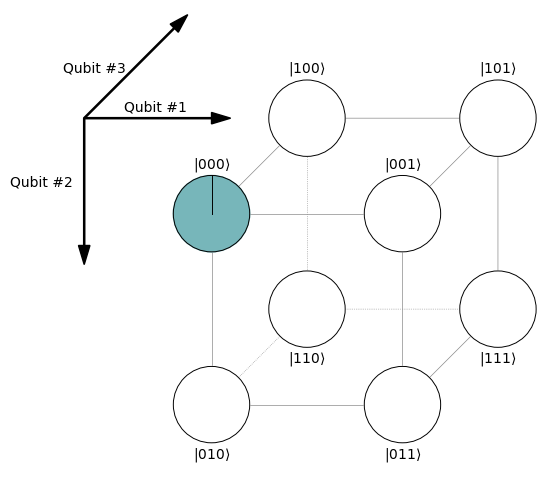

In [8]:
cn = CircleNotation(sim)
dcn = DimensionalCircleNotation(sim)

dcn.show()

Most quantum gates can be used by intuitive methode names. We provided two Jupyter Notebooks to introduce the package. Those can be found on OLAT

- ```introduction.ipynb``` for general introduction on how to use the package and visualization methods 
- ```cheat-sheat.ipynb``` shorthand lookup 

### 4.2 Example: Creating Bell States

**Recall:** [Bell states](https://en.wikipedia.org/wiki/Bell_state#Bell_basis) are maximally entangled states (Lecture 5 - 25.05.23, Slide 31f)
The example used in the lecture was the first bell state:<br/>

$|Bell\rangle_1 = \frac{1}{\sqrt{2}}\left(|0\rangle_2|0\rangle_1 + |1\rangle_2|1\rangle_1\right)$

**Mini-Task** Add the other 3 Bell states below and compare their visualization



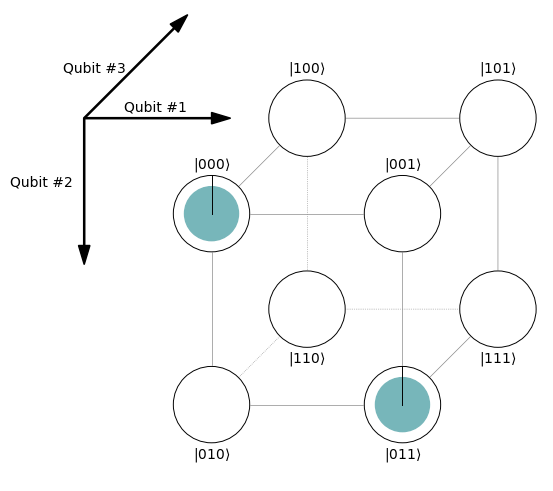

In [27]:
from qc_education_package import Simulator, CircleNotation, DimensionalCircleNotation

n = 3  # No. of qubits
sim = Simulator(n)  # Create a quantum computer simulator object
vis = DimensionalCircleNotation(sim)

sim.had(1)
sim.cNot(1,2)

# For easy replication you can save the state of the simulator
#sim.export_state('bell1') # Save state of simulator
#sim.restoreFromFile('bell1.state')  # Restore from stored state

vis.export_png('bell1.png')

# Task: Create images for bell2 bell3 and bell4
# ...

### 4.3 Advanced Task: Hands On quantum algorithms


Use the ```simulator``` class from the ```qc_education_package``` to simulate and visualize some advanced quantum circuits discussed in the last lecture (Lecture 5 25.05.23), e.g.
- swap test (Slide 48)
- super dense coding (Slide 51)
- Quantum teleportation (Slide 57)

In [12]:
from qc_education_package import Simulator, CircleNotation, DimensionalCircleNotation

n = 3  # No. of qubits
sim = Simulator(n)  # Create a quantum computer simulator object

# Swap test

In [ ]:
from qc_education_package import Simulator, CircleNotation, DimensionalCircleNotation

n = 3  # No. of qubits
sim = Simulator(n)  # Create a quantum computer simulator object

# Super Dense Coding

In [ ]:
from qc_education_package import Simulator, CircleNotation, DimensionalCircleNotation

n = 3  # No. of qubits
sim = Simulator(n)  # Create a quantum computer simulator object

# Quantum key distribution